# Handle Missing Value

1) remove missing value.
2) impute (fill the missing value) the value:- Univariate and Multivariate Imputation

1) univariate:- The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located 


2) Multivariate imputation: A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. we use KNN impute and iterative imputer

Remove missing value:
Complete case analysis (CCA), also called "list-wise deletion” of cases,consists in discarding raw values where values in any of the columns are missing.

CCA literally means analyzing only those observations for which there is information in all of the variables in the data set

Assumption for CCA:= missing completly at random,
missing data is remove when data is missing randomly and only 5% of total data set  is missing  in your dataset

# complete case analysis

In [10]:
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [14]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [15]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [16]:
df.shape

(19158, 13)

In [17]:
# we apply csa only those columns which have less than 5% missing data 
# like city_development_index, enrolled_university, education_level etc.

cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
4493,0.910,no_enrollment,Graduate,0.0,16.0
6930,0.926,no_enrollment,Masters,18.0,36.0
4917,0.897,Full time course,Graduate,4.0,50.0
17064,0.926,no_enrollment,High School,4.0,NaN
2747,0.624,no_enrollment,Graduate,5.0,16.0


In [19]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [20]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

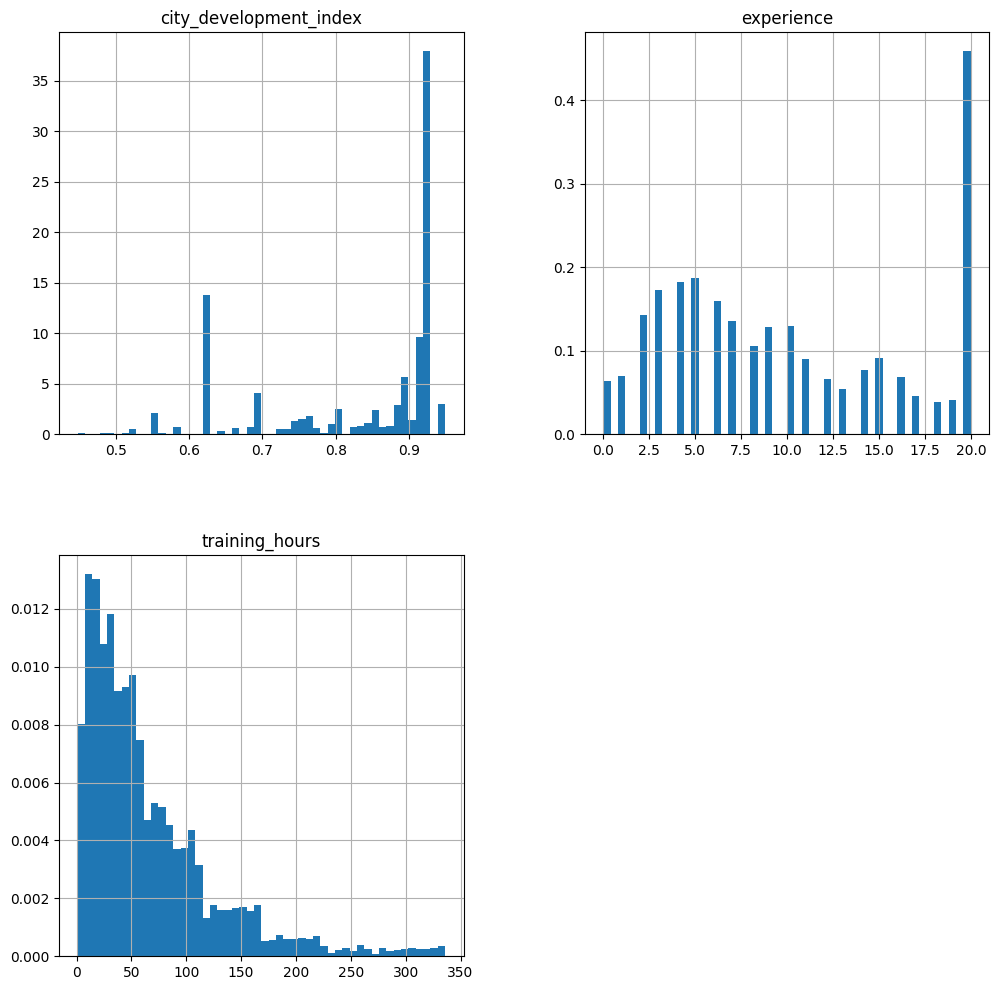

In [21]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<AxesSubplot: >

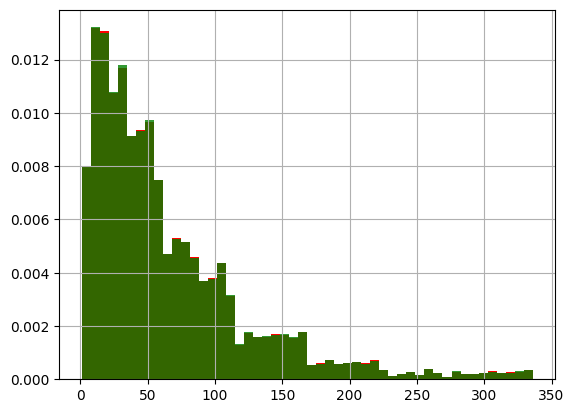

In [22]:
fig= plt.figure()
ax=fig.add_subplot(111)
# original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca, the argument alpha makes the color transparent ,so we can
# see the overlay of the 2 distributions

new_df['training_hours'].hist(bins=50,ax=ax, color='green', density=True, alpha=0.8)


<AxesSubplot: ylabel='Density'>

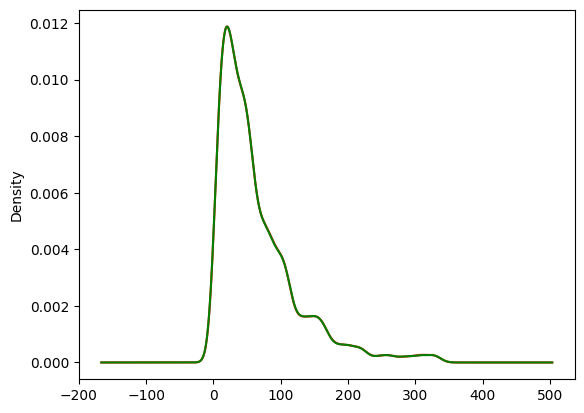

In [23]:
# we se that data is missing is completly randomly

fig= plt.figure()
ax=fig.add_subplot(111)
# original data
df['training_hours'].plot.density(color='red')

#data after cca, the argument alpha makes the color transparent ,so we can
# see the overlay of the 2 distributions
new_df['training_hours'].plot.density(color='green')

<AxesSubplot: >

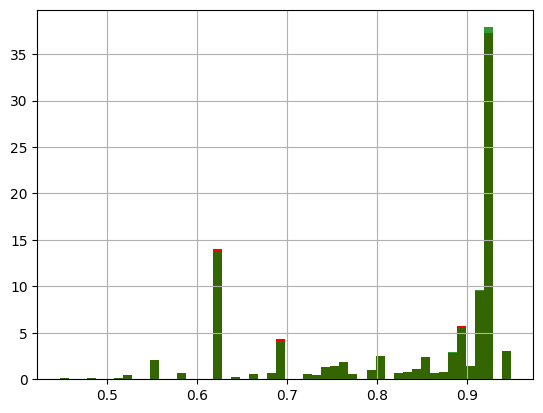

In [24]:
fig= plt.figure()
ax=fig.add_subplot(111)
# original data
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca, the argument alpha makes the color transparent ,so we can
# see the overlay of the 2 distributions

new_df['city_development_index'].hist(bins=50,ax=ax, color='green', density=True, alpha=0.8)


<AxesSubplot: ylabel='Density'>

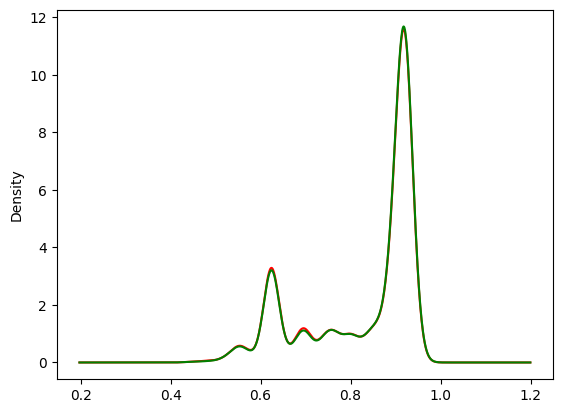

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot: >

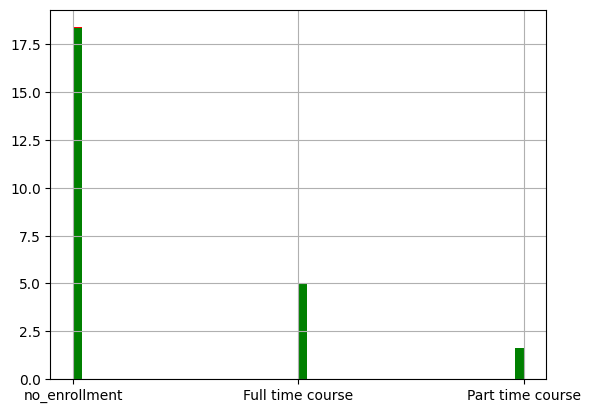

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['enrolled_university'].hist(bins=50,ax=ax, density=True,color='red')
new_df['enrolled_university'].hist(bins=50,ax=ax,density=True,color='green')

<AxesSubplot: >

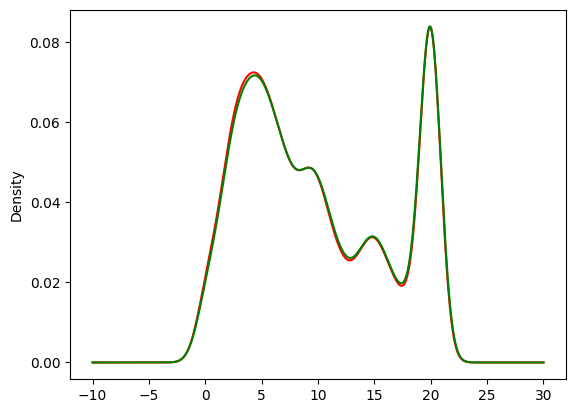

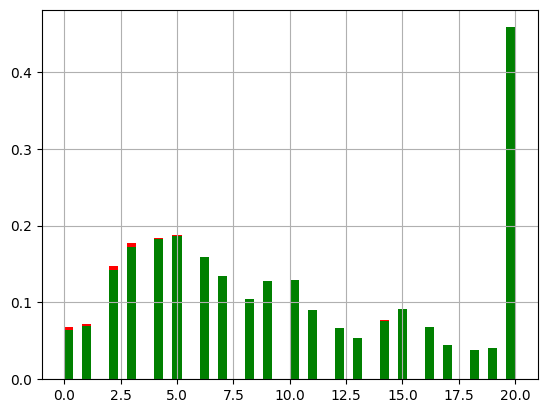

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='green')

fig=plt.figure()
ax=fig.add_subplot(111)
df['experience'].hist(bins=50,ax=ax, density=True,color='red')
new_df['experience'].hist(bins=50, ax=ax, density=True,color='green')

In [28]:
# In categorical columns, we check the ratio of befor cca and after cca

temp=pd.concat([
    # percentage of obserwation per category , original data
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1
)
temp.columns=['orinal','cca']
temp

,orinal,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [29]:

temp=pd.concat([
    # percentage of obserwation per category , original data
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
],axis=1
)
temp.columns=['orinal','cca']
temp

,orinal,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# univariate imputation

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [31]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [32]:
data=df[['experience','training_hours','target']]

In [33]:
data

,experience,training_hours,target
0,20.0,36.0,1.0
1,15.0,47.0,0.0
2,5.0,83.0,0.0
3,0.0,52.0,1.0
4,20.0,8.0,0.0
...,...,...,...
19153,14.0,42.0,1.0
19154,14.0,52.0,1.0
19155,20.0,44.0,0.0
19156,0.0,97.0,0.0


In [34]:
data.isnull().sum()

experience         65
training_hours    766
target              0
dtype: int64

In [35]:
data.isnull().mean()

experience        0.003393
training_hours    0.039983
target            0.000000
dtype: float64

In [36]:
x=data.drop(columns=['target'])
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [37]:
x_train.shape

(15326, 2)

In [38]:
x_test.shape

(3832, 2)

In [39]:
x_train.isnull().mean()

experience        0.003197
training_hours    0.039802
dtype: float64

In [40]:
mean_experience=data['experience'].mean()
median_experience=data['experience'].median()

mean_training_hours=data['training_hours'].mean()
median_training_hours=data['training_hours'].median()

In [41]:
x_train['mean_experience']=data['experience'].fillna(mean_experience)
x_train['median_experience']=data['experience'].fillna(median_experience)
x_train['mean_training_hours']=data['training_hours'].fillna(mean_training_hours)
x_train['median_training_hours']=data['training_hours'].fillna(median_training_hours)

In [42]:
x_train.sample(5)

,experience,training_hours,mean_experience,median_experience,mean_training_hours,median_training_hours
16533,9.0,31.0,9.0,9.0,31.0,31.0
19062,10.0,16.0,10.0,10.0,16.0,16.0
15192,14.0,105.0,14.0,14.0,105.0,105.0
663,7.0,8.0,7.0,7.0,8.0,8.0
2772,15.0,64.0,15.0,15.0,64.0,64.0


In [43]:
# check variance ,it does not show drastic changes 
print('orginal variance',x_train['experience'].var())
print('mean_experience variance',x_train['mean_experience'].var())
print('median_experience variance',x_train['median_experience'].var())

print('orginal variance',x_train['training_hours'].var())
print('mean_training_hours variance',x_train['mean_training_hours'].var())
print('median_training_hours variance',x_train['median_training_hours'].var())

orginal variance 42.31272262041717
mean_experience variance 42.17743322586398
median_experience variance 42.18027629640873
orginal variance 3605.7523453683775
mean_training_hours variance 3462.2281304539747
median_training_hours variance 3474.8349974528564


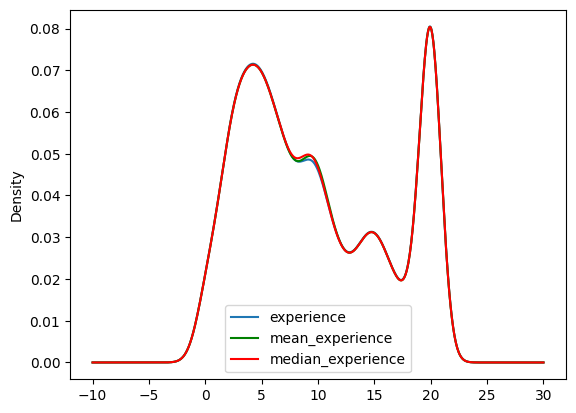

In [44]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
x_train['experience'].plot(kind='kde',ax=ax)

# imputed with mean
x_train['mean_experience'].plot(kind='kde',ax=ax,color='green')

# imputed with median
x_train['median_experience'].plot(kind='kde',ax=ax,color='red')

#add legends

line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')


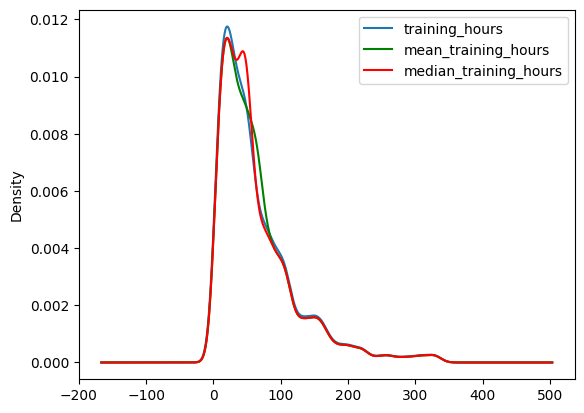

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
x_train['training_hours'].plot(kind='kde',ax=ax)

# imputed with mean
x_train['mean_training_hours'].plot(kind='kde',ax=ax,color='green')

# imputed with median
x_train['median_training_hours'].plot(kind='kde',ax=ax,color='red')

#add legends

line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')


In [46]:
# covariance 
x_train.cov()

,experience,training_hours,mean_experience,median_experience,mean_training_hours,median_training_hours
experience,42.312723,0.923956,42.312723,42.312723,0.886332,1.096184
training_hours,0.923956,3605.752345,0.919676,0.878605,3605.752345,3605.752345
mean_experience,42.312723,0.919676,42.177433,42.177482,0.882793,1.091956
median_experience,42.312723,0.878605,42.177482,42.180276,0.843358,1.051474
mean_training_hours,0.886332,3605.752345,0.882793,0.843358,3462.228130,3462.211456
median_training_hours,1.096184,3605.752345,1.091956,1.051474,3462.211456,3474.834997


In [47]:
x_train.corr()

,experience,training_hours,mean_experience,median_experience,mean_training_hours,median_training_hours
experience,1.000000,0.002366,1.000000,1.000000,0.002317,0.002860
training_hours,0.002366,1.000000,0.002358,0.002252,1.000000,1.000000
mean_experience,1.000000,0.002358,1.000000,0.999967,0.002310,0.002852
median_experience,1.000000,0.002252,0.999967,1.000000,0.002207,0.002746
mean_training_hours,0.002317,1.000000,0.002310,0.002207,1.000000,0.998180
median_training_hours,0.002860,1.000000,0.002852,0.002746,0.998180,1.000000


<AxesSubplot: >

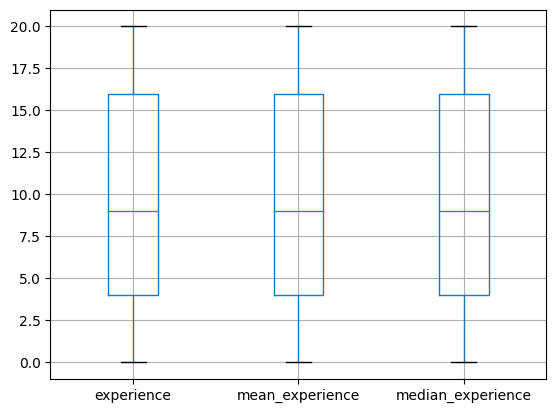

In [48]:
# check the box plot, it show the outlier of data
x_train[['experience','mean_experience','median_experience']].boxplot()

<AxesSubplot: >

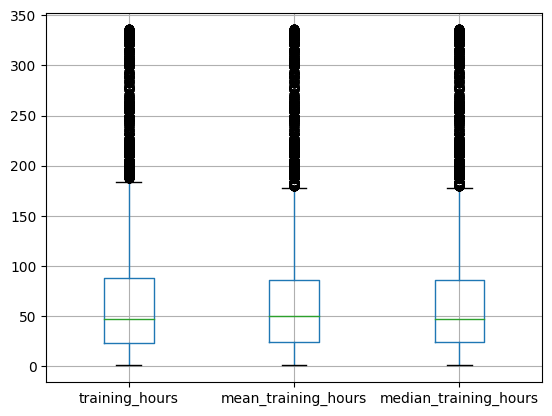

In [49]:
x_train[['training_hours','mean_training_hours','median_training_hours']].boxplot()

# using sklearn library

In [50]:
x.head()

,experience,training_hours
0,20.0,36.0
1,15.0,47.0
2,5.0,83.0
3,0.0,52.0
4,20.0,8.0


In [51]:
x.isnull().sum()

experience         65
training_hours    766
dtype: int64

In [52]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)


In [54]:
x_train.shape

(15326, 2)

SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)

In [55]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [56]:
ct = ColumnTransformer(
    [
    ("imputer1", imputer1,['experience']),
     ("imputer2",imputer2,['training_hours'])
    ])

In [57]:
ct.fit(x_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['experience']),
                                ('imputer2', SimpleImputer(),
                                 ['training_hours'])])

In [58]:
ct.named_transformers_['imputer1'].statistics_

array([9.])

In [59]:
ct.named_transformers_['imputer2'].statistics_

array([65.16179668])

In [60]:
x_train=ct.transform(x_train)
x_test=ct.transform(x_test)

In [61]:
x_train.shape

(15326, 2)

In [62]:
x_train

array([[  2., 134.],
       [  8.,  58.],
       [  7., 206.],
       ...,
       [ 20., 120.],
       [  7.,  48.],
       [  4.,  74.]])

# Arbitrary Value imputation

In [63]:
data1=df[['experience','training_hours','target']]
data1.head()

,experience,training_hours,target
0,20.0,36.0,1.0
1,15.0,47.0,0.0
2,5.0,83.0,0.0
3,0.0,52.0,1.0
4,20.0,8.0,0.0


In [64]:
data1.describe()

,experience,training_hours,target
count,19093.000000,18392.000000,19158.000000
mean,9.928036,65.185787,0.249348
std,6.505268,59.885626,0.432647
min,0.000000,1.000000,0.000000
25%,4.000000,23.000000,0.000000
50%,9.000000,47.000000,0.000000
75%,16.000000,88.000000,0.000000
max,20.000000,336.000000,1.000000


In [65]:
x=data1.drop(columns=['target'])
y=data1['target']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [66]:
x_train

,experience,training_hours
7869,2.0,134.0
2884,8.0,58.0
7207,7.0,206.0
3807,0.0,28.0
1861,7.0,35.0
...,...,...
1099,10.0,13.0
18898,15.0,6.0
11798,20.0,120.0
6637,7.0,48.0


In [67]:
x_train['experience_minus1']=data1['experience'].fillna(-1)
x_train['experience_100']=data1['experience'].fillna(100)
x_train['training_hours_minus1']=data1['training_hours'].fillna(-1)
x_train['training_hours_infinite']=data1['training_hours'].fillna(999)

In [68]:
x_train.head()

,experience,training_hours,experience_minus1,experience_100,training_hours_minus1,training_hours_infinite
7869,2.0,134.0,2.0,2.0,134.0,134.0
2884,8.0,58.0,8.0,8.0,58.0,58.0
7207,7.0,206.0,7.0,7.0,206.0,206.0
3807,0.0,28.0,0.0,0.0,28.0,28.0
1861,7.0,35.0,7.0,7.0,35.0,35.0


In [69]:
# check variance ,it does not show drastic changes 
print('orginal variance',x_train['experience'].var())
print('experience_minus1 variance',x_train['experience_minus1'].var())
print('experience_100 variance',x_train['experience_100'].var())

print('orginal variance',x_train['training_hours'].var())
print('training_hours_minus1 variance',x_train['training_hours_minus1'].var())
print('training_hours_infinite variance',x_train['training_hours_infinite'].var())

orginal variance 42.31272262041717
experience_minus1 variance 42.55920642804059
experience_100 variance 68.02526630049394
orginal variance 3605.7523453683775
training_hours_minus1 variance 3629.5315560523763
training_hours_infinite variance 36792.09533841882


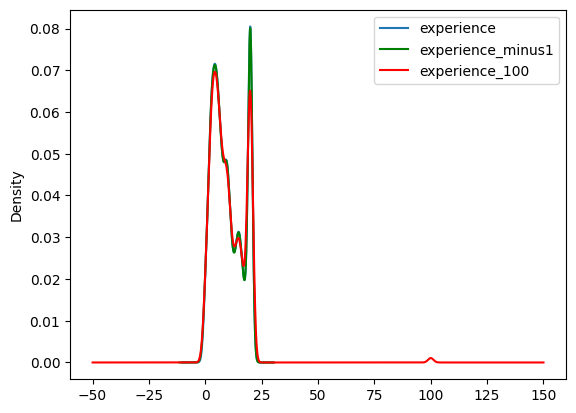

In [70]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
x_train['experience'].plot(kind='kde',ax=ax)

# imputed with mean
x_train['experience_minus1'].plot(kind='kde',ax=ax,color='green')

# imputed with median
x_train['experience_100'].plot(kind='kde',ax=ax,color='red')

#add legends

line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')


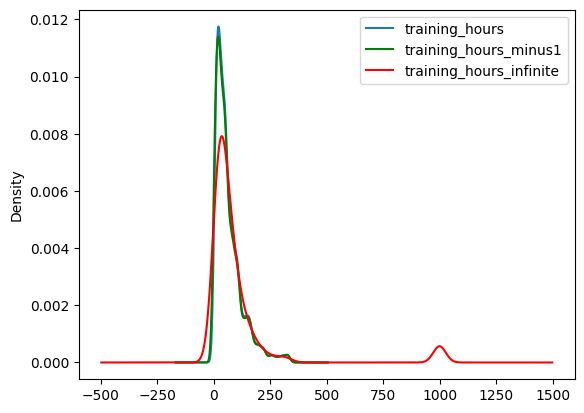

In [71]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
x_train['training_hours'].plot(kind='kde',ax=ax)

# imputed with mean
x_train['training_hours_minus1'].plot(kind='kde',ax=ax,color='green')

# imputed with median
x_train['training_hours_infinite'].plot(kind='kde',ax=ax,color='red')

#add legends

line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')



In [72]:
x_train.cov()

,experience,training_hours,experience_minus1,experience_100,training_hours_minus1,training_hours_infinite
experience,42.312723,0.923956,42.312723,42.312723,1.650073,-9.889281
training_hours,0.923956,3605.752345,0.436040,4.905942,3605.752345,3605.752345
experience_minus1,42.312723,0.436040,42.559206,39.036090,1.134806,-9.688993
experience_100,42.312723,4.905942,39.036090,68.025266,5.841149,-11.245511
training_hours_minus1,1.650073,3605.752345,1.134806,5.841149,3629.531556,1100.829858
training_hours_infinite,-9.889281,3605.752345,-9.688993,-11.245511,1100.829858,36792.095338


# End of Distribution Imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variabl

if data in a numerical column arre missing randomly, then mean or median imputation is a good technique.But if data are not missing ranomly, then we may want to perform end-of-distribution or end-of-tail imputation.

formula:= mean+3*standard deviation

# Handle categorical missing data
technique:= most frequent value imputation (mode).
if missing value is greater than 5% or 10% then we convert the missing value (NaN) into new category with the name of 'missing'

In [73]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [75]:
data2=df[['GarageQual','FireplaceQu','SalePrice']]
data2.head() 

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [76]:
data2.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'number of hhouses')

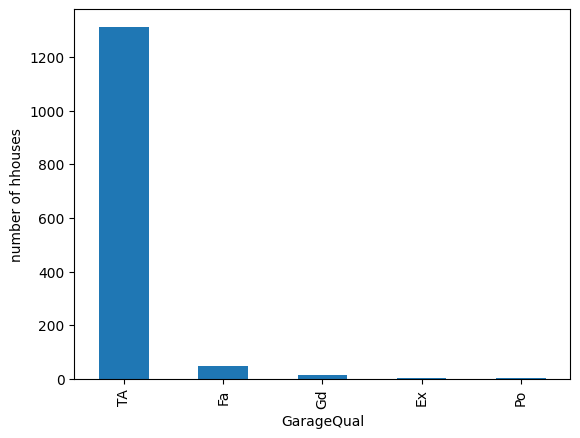

In [77]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('number of hhouses')

In [78]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

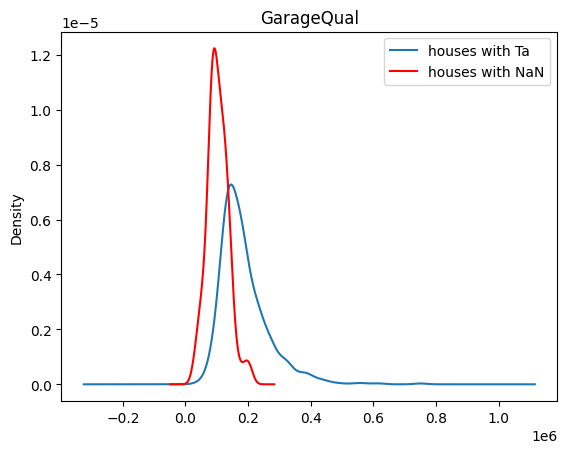

In [79]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['houses with Ta','houses with NaN']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [80]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [81]:
df['GarageQual'].fillna('TA',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\584385255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<AxesSubplot: xlabel='GarageQual'>

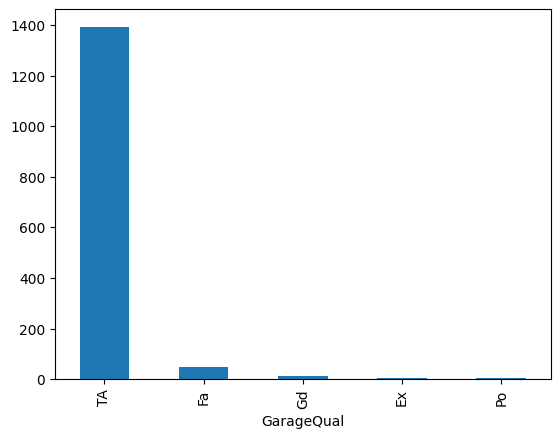

In [82]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

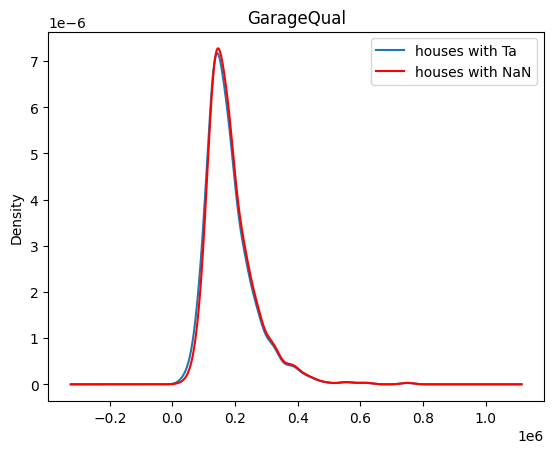

In [83]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
temp.plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['houses with Ta','houses with NaN']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [84]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

<AxesSubplot: xlabel='FireplaceQu'>

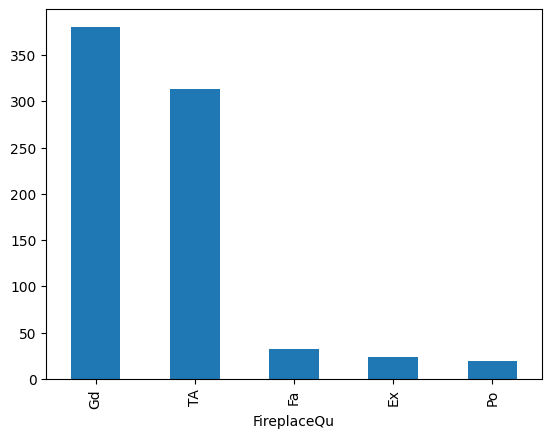

In [85]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [86]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

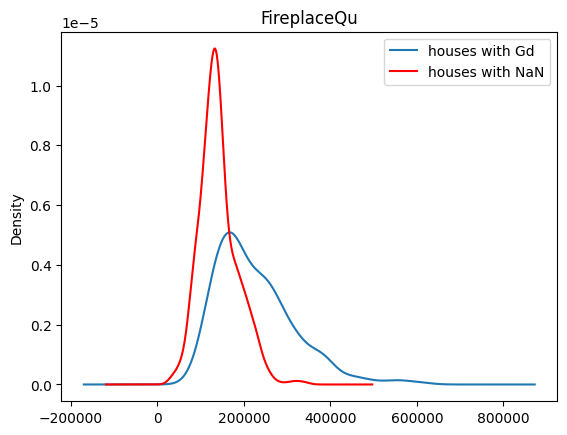

In [87]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['houses with Gd','houses with NaN']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [88]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [89]:
df['FireplaceQu'].fillna('Gd',inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\891419280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<AxesSubplot: xlabel='FireplaceQu'>

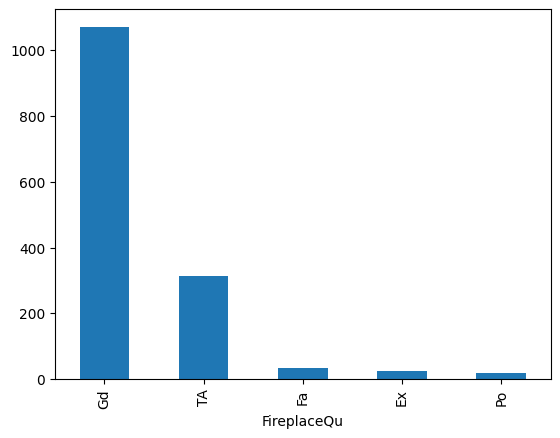

In [90]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

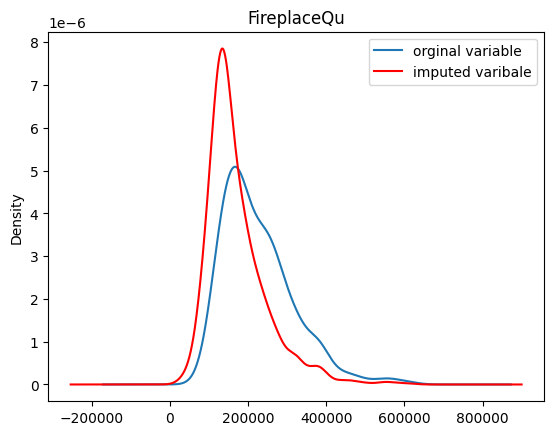

In [91]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['orginal variable','imputed varibale']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

# Random imputation

Random simple imputation is a categorical technique which we can apply on categorical as well as numerical data.
we will fill missing values in our data with random numbers. This random number will be selected from the other numbers which are present in same column of data where we have a missing value.

Preserves the variance of the varibale.it is suited fo rlinear model as it does not distort the distribution ,regardless of the % of NaN

In [92]:
# apply on numerical data
import seaborn as sns

In [93]:
data_df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv',usecols=['Age','Fare','Survived'])
data_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [94]:
data_df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [95]:
x=data_df.drop(columns=['Survived'])
y=data_df['Survived']
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape

(712, 2)

In [97]:
x_test.shape

(179, 2)

In [98]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [99]:
x_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [100]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]  #  it give me all row ,which have NAN values in x_Train['Age_imputer']

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [101]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values # select a sample from x_train['Age'] without NAN value and number of sample is equal to number of NAN value in x_train['Age']

array([59.  , 18.  , 24.  , 45.  ,  2.  , 18.  , 36.  , 40.  , 25.  ,
       24.  , 42.  , 42.  , 20.  , 49.  , 34.  , 58.  , 30.  , 24.  ,
        9.  , 45.  , 43.  , 25.  , 30.  , 36.5 , 33.  , 29.  , 20.  ,
       36.  , 38.  , 33.  ,  4.  , 61.  , 16.  , 48.  , 26.  , 24.  ,
       43.  , 62.  , 23.  , 24.  , 38.  , 22.  , 30.  , 22.  , 27.  ,
       24.  , 24.  , 34.  , 25.  , 21.  , 34.  , 30.  , 21.  , 42.  ,
       24.  , 30.  , 33.  , 39.  ,  4.  , 19.  , 58.  , 51.  , 25.  ,
       22.  , 35.  , 28.  , 37.  ,  0.83, 29.  , 21.  , 42.  , 41.  ,
       16.  , 22.  , 54.  , 27.  , 18.  , 26.  , 40.  , 28.  , 17.  ,
       20.  , 24.  , 45.  , 62.  , 24.  , 24.  , 36.  , 44.  , 39.  ,
       42.  ,  0.83, 31.  , 37.  ,  9.  , 24.  , 34.  , 23.  , 20.  ,
       25.  , 29.  , 17.  , 36.  , 39.  ,  9.  , 35.  , 25.  , 32.  ,
       21.  , 18.  , 26.  , 14.  ,  5.  , 28.  , 17.  , 18.  , 40.  ,
       21.  , 24.  , 29.  , 40.5 , 33.  , 21.  , 45.5 , 31.  , 17.  ,
       28.  , 27.  ,

In [102]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\2361838934.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [103]:
x_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,64.0
493,71.0,49.5042,71.0
527,NaN,221.7792,28.0
168,NaN,25.9250,25.0


In [104]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\3058997308.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [105]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,16.0
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [150]:
sns.distplot(x_train['Age'],label='orginal', hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputer', hist=False)

plt.legend()
plt.show()

KeyError: 'Age'

In [107]:
print('imputer',x_train['Age_imputed'].var())
print('original',x_train['Age'].var())

imputer 203.99835460974413
original 204.34951339046142


In [108]:
x_train[['Fare','Age','Age_imputed']].corr()

,Fare,Age,Age_imputed
Fare,1.000000,0.095814,0.113845
Age,0.095814,1.000000,1.000000
Age_imputed,0.113845,1.000000,1.000000


In [109]:
x_train.cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,79.130249
Age_imputed,204.349513,79.130249,203.998355


<AxesSubplot: >

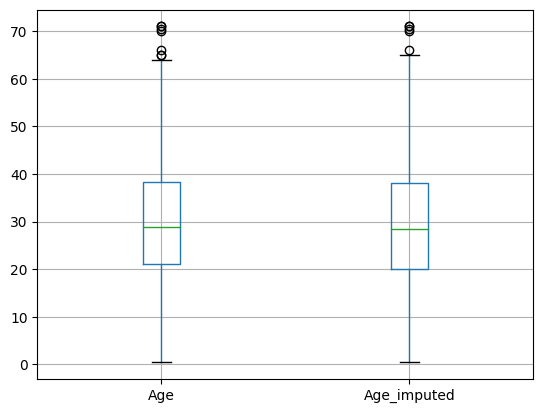

In [110]:
x_train[['Age','Age_imputed']].boxplot() # outlier

In [111]:
# sample_Value=x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))
# every fare has same value of Age

In [112]:
# apply for Categorical Data
data_df1=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data_df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [113]:
data_df1.tail()

,FireplaceQu,GarageQual,SalePrice
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125
1459,NaN,TA,147500


In [114]:
data_df1.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [115]:
x=data_df1
y=data_df1['SalePrice']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [117]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000


In [118]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']

x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [119]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [120]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values


C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\4064591728.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual']

In [121]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,Gd
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [123]:
temp=pd.concat(
    [
        x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts()/len(x_train)
    ],
    axis=1)
temp.columns=['original','imputed']

In [124]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035103
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [125]:
temp=pd.concat(
    [
        x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
    ],
    axis=1)
temp.columns=['original','imputed']

In [126]:
temp

,original,imputed
Gd,0.494272,0.498288
TA,0.412439,0.406678
Fa,0.040917,0.041952
Po,0.027823,0.028253
Ex,0.024550,0.024829


In [131]:
x_train['FireplaceQu'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [130]:
x_train['FireplaceQu'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\3744730060.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\3744730060.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

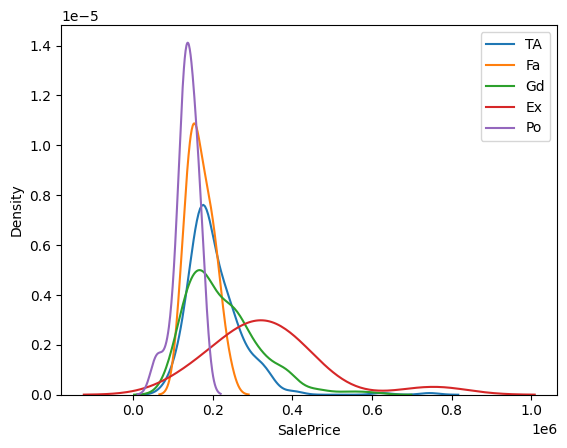

In [152]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()    

C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\1715289203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],label=category,hist=False)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_23972\1715289203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in se

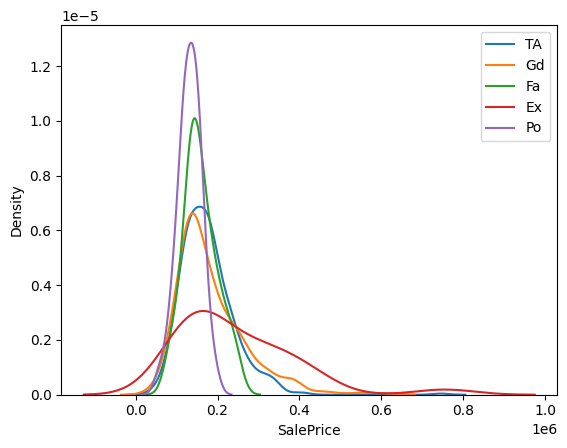

In [151]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],label=category,hist=False)
plt.legend()
plt.show()

# Misisng Indicator

sklearn.impute.MissingIndicator(*, missing_values=nan, features='missing-only', sparse='auto', error_on_new=True)


In [210]:
data_df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv',usecols=['Age','Fare','Survived'])
data_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [211]:
x=data_df.drop(columns=['Survived'])
y=data_df['Survived']
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape

(712, 2)

In [213]:
x_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [214]:
si=SimpleImputer()
x_train_trf=si.fit_transform(x_train)
x_test_trf=si.transform(x_test)

In [215]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6145251396648045

In [216]:
from sklearn.impute import MissingIndicator

In [217]:
mi=MissingIndicator()
mi.fit(x_train)


MissingIndicator()

In [218]:
x_train_missing=mi.transform(x_train)

In [219]:
x_test_missing=mi.transform(x_test)

In [220]:
x_train['Age_NA']=x_train_missing
x_test['Age_NA']=x_test_missing

In [221]:
x_train.sample(5)

,Age,Fare,Age_NA
774,54.0,23.0000,False
135,23.0,15.0458,False
596,NaN,33.0000,True
699,42.0,7.6500,False
843,34.5,6.4375,False


In [222]:
si=SimpleImputer()
x_train_trf2=si.fit_transform(x_train)


In [223]:
x_test_trf2=si.transform(x_test)

In [224]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6145251396648045

# without using misssing indicator class

In [225]:
si=SimpleImputer(add_indicator=True)

In [226]:
x_train=si.fit_transform(x_train)

In [227]:
x_test=si.transform(x_test)

In [228]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6145251396648045